In [1]:
import matplotlib
import matplotlib.pylab as plt
from matplotlib.dates import date2num, DateFormatter,\
    MonthLocator, WeekdayLocator, DayLocator, MinuteLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
import numpy as np
import pandas as pd

matplotlib.style.use('bmh')
plt.rcParams['figure.figsize'] = 15, 10

In [2]:
frame = pd.DataFrame.from_csv('/tmp/bitstampUSD.out.csv')
frame.set_index(pd.to_datetime(frame.index, unit='s'), inplace=True)
frame.index.name = 'date'
frame['time'] = date2num(frame.index.to_pydatetime())
frame[:5]

,open,high,low,close,order1_type,order1_side,order1_price,order2_type,order2_side,order2_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time
date,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,430.89,431.06,430.19,431.06,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.06,735964.000000
2016-01-01 00:05:00,431.06,432.53,430.21,432.51,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,432.51,735964.003472
2016-01-01 00:10:00,432.38,432.38,431.46,431.46,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.006944
2016-01-01 00:15:00,432.38,432.58,431.47,431.47,LIMIT,SELL,435.75,NaN,NaN,NaN,0,0,1.0,0.0,431.47,735964.010417
2016-01-01 00:20:00,431.58,432.40,431.46,431.46,LIMIT,SELL,435.76,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.013889


In [3]:
next_order_frame = frame[['order1_side']].shift(-1).copy()
next_order_frame.columns = ['order1_side_next']
next_frame = frame.join(next_order_frame)
next_frame[:5]

,open,high,low,close,order1_type,order1_side,order1_price,order2_type,order2_side,order2_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time,order1_side_next
date,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,430.89,431.06,430.19,431.06,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.06,735964.000000,NaN
2016-01-01 00:05:00,431.06,432.53,430.21,432.51,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,432.51,735964.003472,NaN
2016-01-01 00:10:00,432.51,432.51,431.46,431.46,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.006944,SELL
2016-01-01 00:15:00,431.46,432.58,431.46,431.47,LIMIT,SELL,435.75,NaN,NaN,NaN,0,0,1.0,0.0,431.47,735964.010417,SELL
2016-01-01 00:20:00,431.47,432.40,431.46,431.46,LIMIT,SELL,435.76,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.013889,SELL


In [14]:
next_frame[next_frame['order1_side'] != next_frame['order1_side_next']][:10]

,open,high,low,close,order1_type,order1_side,order1_price,order2_type,order2_side,order2_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time,order1_side_next
date,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,430.89,431.06,430.19,431.06,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.00,0.00,431.06,735964.000000,NaN
2016-01-01 00:05:00,431.06,432.53,430.21,432.51,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.00,0.00,432.51,735964.003472,NaN
2016-01-01 00:10:00,432.51,432.51,431.46,431.46,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.00,0.00,431.46,735964.006944,SELL
2016-01-07 02:35:00,435.55,439.90,435.55,438.60,LIMIT,SELL,437.36,NaN,NaN,NaN,0,0,0.00,437.36,437.36,735970.107639,BUY
2016-01-07 07:50:00,450.00,451.00,443.01,446.00,LIMIT,BUY,443.90,NaN,NaN,NaN,0,0,0.98,2.33,439.41,735970.326389,SELL
2016-01-15 13:55:00,386.05,395.59,386.05,393.78,LIMIT,SELL,393.37,NaN,NaN,NaN,0,0,0.00,387.83,387.83,735978.579861,BUY
2016-01-15 14:20:00,389.10,390.86,384.38,385.00,LIMIT,BUY,386.71,NaN,NaN,NaN,0,0,1.00,1.11,386.11,735978.597222,SELL
2016-01-15 18:15:00,392.81,394.55,391.80,391.87,LIMIT,SELL,394.07,NaN,NaN,NaN,0,0,0.00,395.17,395.17,735978.760417,BUY
2016-01-15 19:35:00,390.00,390.02,387.10,390.00,LIMIT,BUY,387.23,NaN,NaN,NaN,0,0,1.02,0.19,397.99,735978.815972,SELL


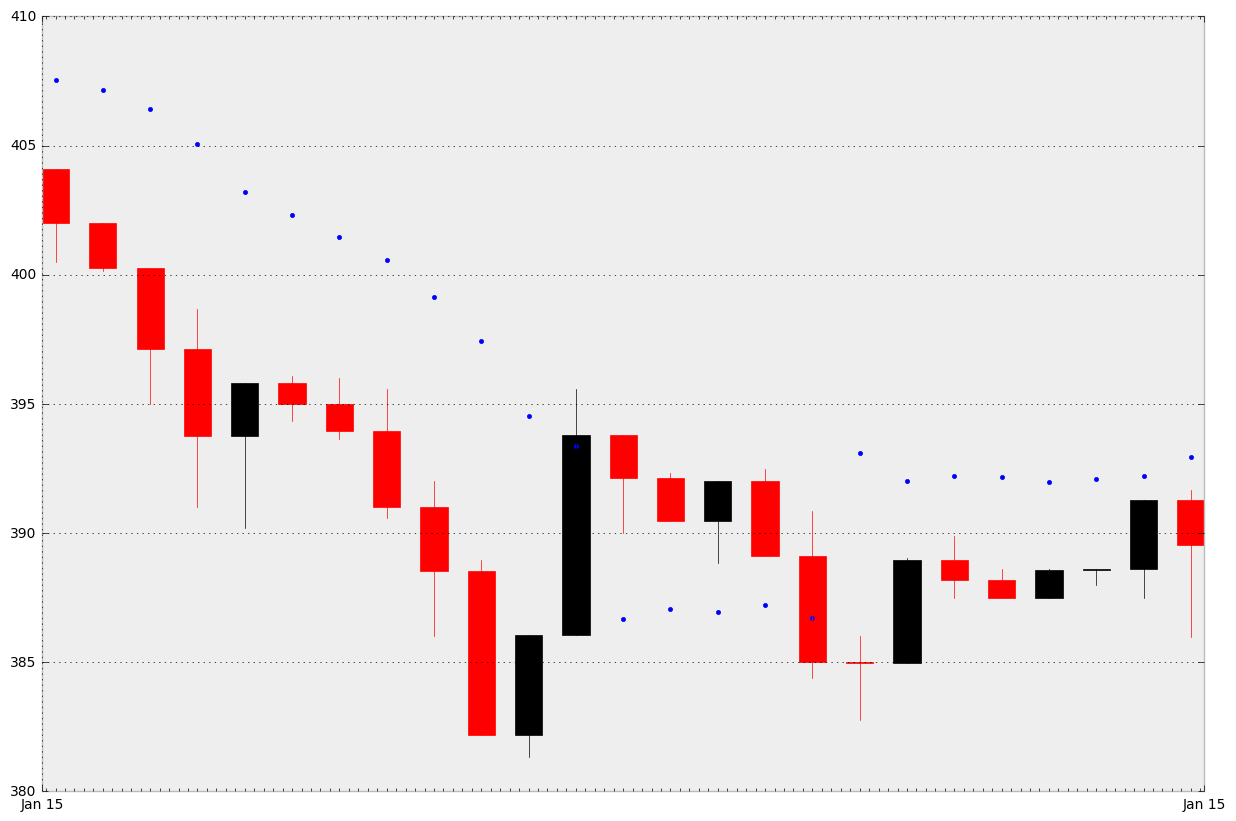

In [17]:
subframe = frame['2016-01-15 13:00':'2016-01-15 15:00']

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
ax.xaxis.set_minor_locator(MinuteLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.plot(subframe['time'].values, subframe['order1_price'].values, color='blue', linestyle='', marker='.')
candlestick_ohlc(ax, subframe[['time', 'open', 'high', 'low', 'close']].values, width=0.002)

ax.xaxis_date()
ax.autoscale_view()

plt.show()

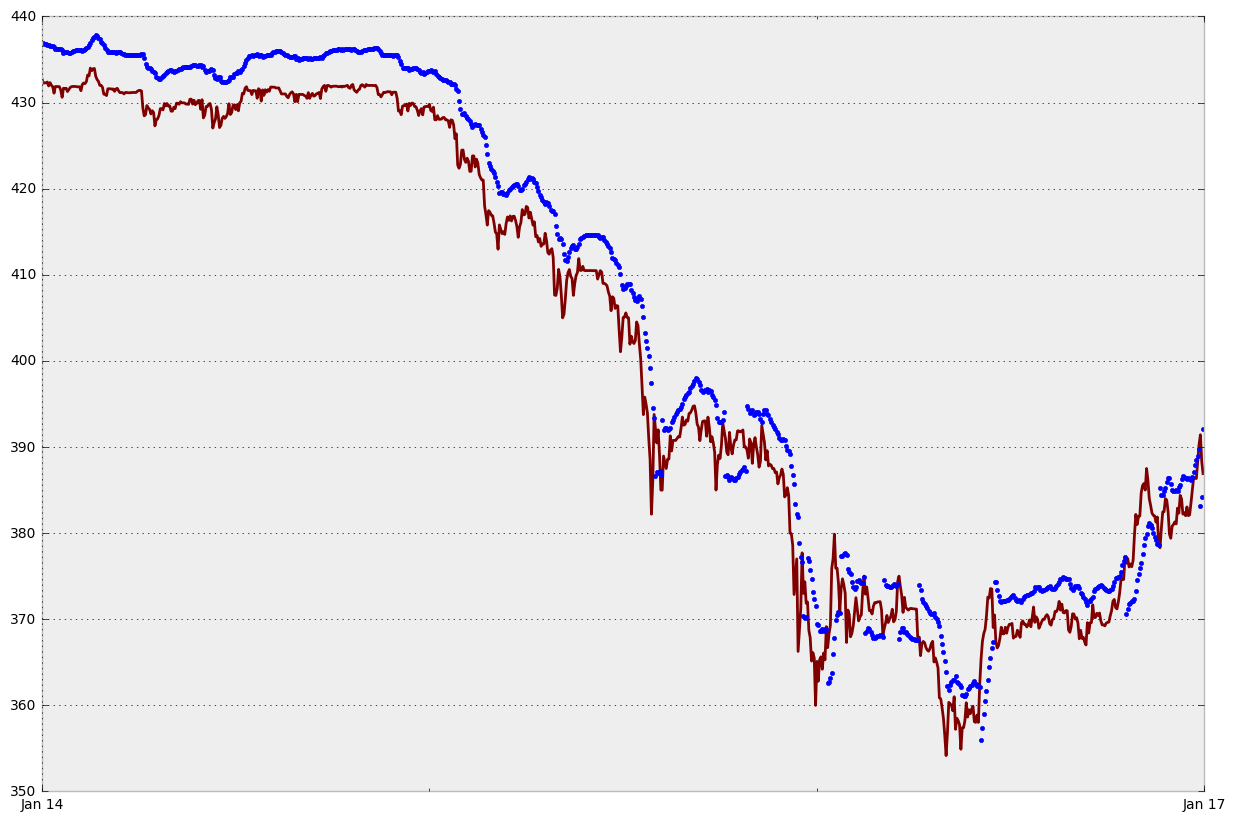

In [27]:
subframe = frame['2016-01-14':'2016-01-16']

fig, ax = plt.subplots()
ax.plot(subframe['time'], subframe['close'].values, color='maroon')
ax.plot(subframe['time'], subframe['order1_price'].values, linestyle='', marker='.', color='blue')
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
ax.xaxis.set_minor_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

plt.show()